In [3]:
import matplotlib as plt
import pandas as pd
import numpy as np
import keras
from tqdm import tqdm
from keras.preprocessing import image
import matplotlib 
from matplotlib import pyplot as plt
import os
import cv2

In [4]:
data = []
labels = []
classes = 43
cur_path = 'Train'

for i in tqdm(os.listdir(cur_path)):
    dir = cur_path + '/' + i
    for j in os.listdir(dir):
        img_path = dir+'/'+j
        img = cv2.imread(img_path,-1)
        img = cv2.resize(img, (64,64), interpolation = cv2.INTER_NEAREST)
        data.append(img)
        labels.append(i)
        
data = np.array(data)
labels = np.array(labels)
print(data.shape, labels.shape)

100%|██████████| 43/43 [00:12<00:00,  3.42it/s]


(39209, 64, 64, 3) (39209,)


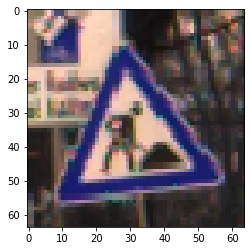

In [5]:
plt.imshow(data[3907])

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, AveragePooling2D, Flatten, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split

In [7]:
import tensorflow as tf

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size= 0.25, random_state=21)

print((x_train.shape, y_train.shape), (x_test.shape, y_test.shape))

# converting the labels into one hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 43)
y_test = tf.keras.utils.to_categorical(y_test, 43)

((29406, 64, 64, 3), (29406,)) ((9803, 64, 64, 3), (9803,))


In [8]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu', input_shape=(64,64,3)))
model.add(AveragePooling2D(pool_size = (2, 2)))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(AveragePooling2D(pool_size = (2, 2)))

model.add(Flatten())

model.add(Dense(units=120, activation='relu'))
model.add(Dense(units=84, activation='relu'))
model.add(Dense(units=43, activation = 'softmax'))

In [9]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy']) #CCE: For Multiclass problems
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 60, 60, 32)        2432      
_________________________________________________________________
average_pooling2d (AveragePo (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 32)        25632     
_________________________________________________________________
average_pooling2d_1 (Average (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 120)               649080    
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

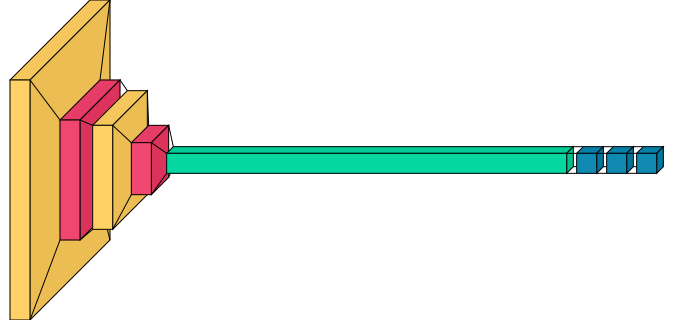

In [10]:
import visualkeras
visualkeras.layered_view(model)

In [11]:
epochs = 15
history = model.fit(x_train, y_train, 
                   batch_size=64,
                   epochs=epochs,
                   validation_data=(x_test, y_test))
    
    

Epoch 1/15
460/460 [==============================] - 122s 233ms/step - loss: 3.0646 - accuracy: 0.4854 - val_loss: 0.4358 - val_accuracy: 0.8881
Epoch 2/15
460/460 [==============================] - 106s 230ms/step - loss: 0.3461 - accuracy: 0.9119 - val_loss: 0.2263 - val_accuracy: 0.9471
Epoch 3/15
460/460 [==============================] - 106s 230ms/step - loss: 0.1915 - accuracy: 0.9489 - val_loss: 0.2361 - val_accuracy: 0.9490
Epoch 4/15
460/460 [==============================] - 107s 232ms/step - loss: 0.1448 - accuracy: 0.9628 - val_loss: 0.2257 - val_accuracy: 0.9492
Epoch 5/15
460/460 [==============================] - 106s 231ms/step - loss: 0.1120 - accuracy: 0.9691 - val_loss: 0.1838 - val_accuracy: 0.9621
Epoch 6/15
460/460 [==============================] - 106s 230ms/step - loss: 0.0921 - accuracy: 0.9768 - val_loss: 0.1863 - val_accuracy: 0.9642
Epoch 7/15
460/460 [==============================] - 106s 231ms/step - loss: 0.0696 - accuracy: 0.9813 - val_loss: 0.2485 -

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


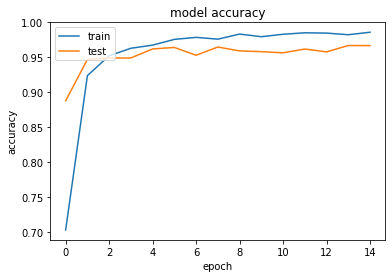

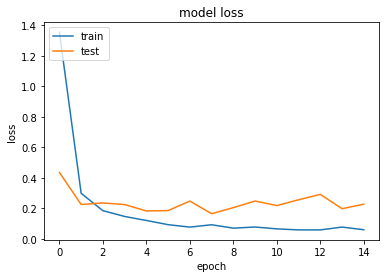

In [12]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:
model.save('lenet_model')

INFO:tensorflow:Assets written to: lenet_model/assets


In [14]:
y_test = pd.read_csv('Test.csv')

In [15]:
labels_test = y_test['ClassId'].values
img_test = y_test['Path'].values
test_dir = ''
data = []
for img in img_test:
    img_path = os.path.join(test_dir, img)
    image = cv2.imread(img_path, -1)
    image = cv2.resize(image, (64,64), interpolation = cv2.INTER_NEAREST)
    data.append(np.array(image))
X_test = np.array(data)

In [19]:
from sklearn.metrics import accuracy_score

pred = np.argmax(model.predict(X_test), axis=-1)

print("Test accuracy: ", accuracy_score(labels_test, pred) * 100 )

Test accuracy:  90.11876484560571
